<h4> Zadanie1: Czy fakt, że nie oczyściliśmy danych ze stopwords czy znaków interpunkcyjncyh znacząco wpłynął na pogorszenie predykcji? Odpowiedź uzasadnij (bez obliczeń, chodzi o 2 zdania komentarza).

Nie wpływa istotnie na accuracy, prawdopodobnie przez to, że znaki interpunkcyjne i stopwords występują z podobną częstotliwością w obu zbiorach.

<h4> Zadanie2: Powtórz 20 razy predykcję za pomocą metody Naive Bayes za każdym razem tasując listę documents (po co?). Zapisz do listy dokładności uzyskane za każdym razem. Wyznacz średnią dokładność i odchylenie standardowe z tych dokładności (wcześniej przerób listę na obiekt typu array). Narysuj histogram dokładności.

In [3]:
import nltk
from nltk.corpus import movie_reviews #korpus z recenzjami - 1000 poztytywnych i 1000 negatywnych

#Tworze funkcje, ktorej argumentami będzie lista wyrazow, a ktora będzie wywolywana dla kolejnych recenzji, będe sprawdzal czy występują w niej slowa z word_features
def find_features(document): #przez document rozumiemy tutaj lista wyrazow
    words = set(document)    #patrze na unikatowe slowa
    features = {}            #tworzę pusty slownik
    for w in word_features: #word_features zdefiniowane wyzej [lista 3000 najczęstych slow we wszystkich recenzjach]
        features[w] = (w in words) #True or False, dla kazdego slowa z word_features w zaleznosci czy jest czy nie w dokumencie
    return features

documents = [] 

for category in movie_reviews.categories(): #dla kazdej z kategorii (pos/neg)
    for fileid in movie_reviews.fileids(category): #dla wszytkich recenzji z danej kategorii
        documents.append((list(movie_reviews.words(fileid)), category)) #dodaj element typu ([slowa z recenzji], 'pos/neg')

import random #losowe libczy

classifiers = []
for i in range(20):
    random.shuffle(documents) #tasowanie kolejności

    all_words = [] #tu będą wszystkie slowa występujące we wszystkich recenzjach
    
    for w in movie_reviews.words():  #dla wszystkich slow ze wszystkich dokumentow korpusu movie_reviews
        all_words.append(w.lower())  #dodaje do listy all_words slowa zapisane z malej litery

    all_words = nltk.FreqDist(all_words) #liczę częstosci slow i nadpisuje zmienną all_words
    word_features = [x[0] for x in all_words.most_common(3000)] #do zmiennej word_features zapisuje pierwsze 3000 najczęstszych slow

    featuresets = [(find_features(rev),category) for (rev,category) in documents] #zapisuje liste krotek (slownik jak wyzej, pos/neg)

    training_set = featuresets[:1900] #jako zbior treningowy biorę pierwsze 1900 recenzji
    testing_set = featuresets[1900:]  #jako zbior tetowy biorę pozostałe recenzje
    #wykonuje algorytm Naive Bayes na zbiorze treningowym
    classifier = nltk.NaiveBayesClassifier.train(training_set)
    classifiers.append((nltk.classify.accuracy(classifier,testing_set))*100)

print(classifiers)

[78.0, 83.0, 78.0, 85.0, 82.0, 86.0, 79.0, 79.0, 81.0, 81.0, 74.0, 82.0, 80.0, 78.0, 74.0, 83.0, 84.0, 80.0, 77.0, 81.0]


80.25
3.1603006186120965


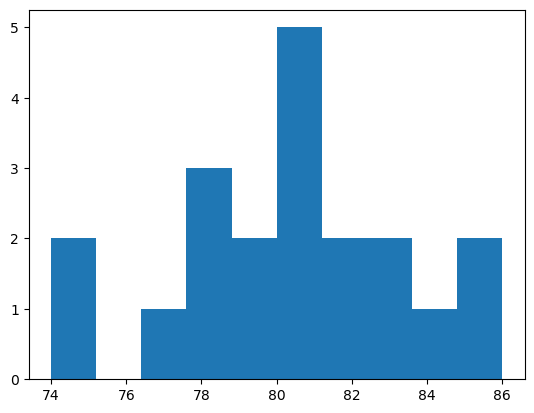

In [4]:
import matplotlib.pyplot as plt
import numpy as np

classifiers = np.array(classifiers)
print(classifiers.mean())
print(classifiers.std())
plt.hist(classifiers)
plt.show()

<h4> Zadanie3: Wyjaśnij czemu istotnym jest aby grupy tekstów reprezentujących klasy były w miarę równoliczne. Zbuduj model NaiveBayes, gdzie jako zbiór treningowy wybierz 900 recenzji pozytywnych i 100 negatywnych. Następnie zabadaj jak model sprawdza się na 100 pozostałych recenzjach pozytywnych a jak na 100 negatywnych (innych niż przy trenowaniu modelu). Skomentuj otrzymane wyniki.

Przy nierównolicznych zbiorach danych dla klas, model będzie gorzej przewidywał katoegorie dla mniej licznego zbioru. Raz, że ma mniejszą baze do nauki, dwa -  prawdopodobieństwo bardziej licznej kategorii będzie większe.

In [5]:
import nltk
from nltk.corpus import movie_reviews 
movie_reviews.categories()

documents = [] 

for category in movie_reviews.categories(): 
    for fileid in movie_reviews.fileids(category): 
        documents.append((list(movie_reviews.words(fileid)), category)) 

import random 
    
all_words = [] 

for w in movie_reviews.words():  
    all_words.append(w.lower())  

all_words = nltk.FreqDist(all_words) 
word_features = [x[0] for x in all_words.most_common(3000)] 

def find_features(document): #przez document rozumiemy tutaj lista wyrazow
    words = set(document)    #patrze na unikatowe slowa
    features = {}            #tworzę pusty slownik
    for w in word_features: #word_features zdefiniowane wyzej [lista 3000 najczęstych slow we wszystkich recenzjach]
        features[w] = (w in words) #True or False, dla kazdego slowa z word_features w zaleznosci czy jest czy nie w dokumencie
    return features

featuresets = [(find_features(rev),category) for (rev,category) in documents] 

training_set = featuresets[:100] + featuresets[1000:1900]  
testing_set_neg = featuresets[100:200]
testing_set_pos = featuresets[1900:]  

#Naive Bayes na zbiorze treningowym
classifier = nltk.NaiveBayesClassifier.train(training_set)
accuracy_pos = nltk.classify.accuracy(classifier,testing_set_pos)*100
accuracy_neg = nltk.classify.accuracy(classifier,testing_set_neg)*100

print(f"Accuracy for positive: {accuracy_pos}\nAccuracy for negative: {accuracy_neg}")

Accuracy for positive: 99.0
Accuracy for negative: 28.999999999999996


Zadanie4: Zbuduj model do predykcji wiadomości SPAM/HAM. W tym celu użyj pliku  spam_ham.txt . Każda wiadomość opatrzona jest odpowiednim tagiem na początku kolejnego wiersza. Sprawdź ile w pliku znajduje się wiadomości typu SPAM i HAM. Uwzględnij uwagę z poprzedniego zadania.

In [6]:
import random
import pandas as pd
with open("spam_ham.txt", "r") as file:
    lines = file.readlines()

#obróbka danych
data =[]
for i in range(0, len(lines)-1):
    tag = lines[i].split("\t")[0].strip()
    message = lines[i].split("\t")[1].strip()
    data.append((tag, message))

#function that generates new spam messages, len(newspam) = len(spam), use as many times as you want
def generate_spam(data):
    part1_list =[]
    part2_list =[]
    part3_list =[]
    part4_list =[]

    spam = [message for tag, message in data if tag == "spam"]

    # przy podziale na dwa accuracy była mniejsza
    for message in spam:
        message = message.split()
        a = len(message)//4
        part1_list.append(' '.join(message[:a]))
        part2_list.append(' '.join(message[a:2*a]))
        part3_list.append(' '.join(message[2*a:3*a]))
        part4_list.append(' '.join(message[3*a:]))
        
    import random
    random.shuffle(part1_list)
    random.shuffle(part2_list)
    random.shuffle(part3_list)
    random.shuffle(part4_list)

    new_spam = []
    for i in range(len(part1_list)):
        new_spam.append(part1_list[i] + " " + part2_list[i] + " " + part3_list[i] + " " + part4_list[i])
    return new_spam

#how much spam do we need
print("Spam needed: ", len([tag for tag, message in data if tag == "ham"]) - len([tag for tag, message in data if tag == "spam"]))
new_spam = []
for i in range(((len([tag for tag, message in data if tag == "ham"]) - len([tag for tag, message in data if tag == "spam"]))// len([tag for tag, message in data if tag == "spam"])) +1):
    new_spam = new_spam + generate_spam(data)
new_spam = new_spam[:4079]

#otagowanie spamu
new_spam_tagged= []
for spam in new_spam:
    new_spam_tagged.append(("spam", spam))

data = data + new_spam_tagged

# tasowanie
random.shuffle(data)

#ostatni check czy na pewno jest po równo
print("Ham: ", len( [message for tag, message in data if tag == "ham"]))
print("Spam: ", len( [message for tag, message in data if tag == "spam"]))

Spam needed:  4079
Ham:  4826
Spam:  4826


In [7]:
import spacy
nlp = spacy.load("en_core_web_sm") 

def prep_text(text):
    doc = nlp(text) #change text to spacy 
    #lemmatisation, omits words with numbers (is_alpha) and stopwords (is.stop)
    return [token.lemma_ for token in doc if not token.is_stop]

# data prep for naivebayes
def get_features(text):
    return {word: True for word in prep_text(text)}

#model creation
featuresets = [(get_features(message), label) for (label, message) in data]
train_set = featuresets[:5016]  #train set (more less 90%)
test_set = featuresets[5016:]  # test set

#model training
classifier = nltk.NaiveBayesClassifier.train(train_set)

#testing
accuracy = nltk.classify.accuracy(classifier, test_set) * 100

print(f"Accuracy: {accuracy}%")
classifier.show_most_informative_features(10)

Accuracy: 94.30543572044866%
Most Informative Features
                       £ = True             spam : ham    =    314.3 : 1.0
                   Nokia = True             spam : ham    =    104.4 : 1.0
                    1000 = True             spam : ham    =     93.3 : 1.0
                    draw = True             spam : ham    =     87.5 : 1.0
                 service = True             spam : ham    =     82.5 : 1.0
                  Mobile = True             spam : ham    =     68.6 : 1.0
                   await = True             spam : ham    =     60.8 : 1.0
                 voucher = True             spam : ham    =     58.2 : 1.0
                  camera = True             spam : ham    =     56.9 : 1.0
                  select = True             spam : ham    =     55.6 : 1.0


In [8]:
from sklearn.metrics import confusion_matrix
true_labels = []
predicted_labels = []

for features, actual_label in test_set:
    predicted_label = classifier.classify(features)
    true_labels.append(actual_label)
    predicted_labels.append(predicted_label)

# confusion matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=['spam', 'ham'])
print(cm)

[[2286    1]
 [ 263 2086]]


Można zastosować też np. https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html 

Warto przejrzeć: https://poleval.pl/

<h4> Zadanie5: Przeanalizuj dane allegro-reviews za pomocą modelu NaiveBayes. 
    
- Zbuduj model w którym rozważysz tylko recenzje z ocenami 5. i 1.
- Zbuduj model dla pełnych danych.
- Dokonaj modyfikacji, które poprawią te modele.

Uwagi:
- dane są już podzielone na zbiór treningowy i testowy
- dane nie są zbilasnowane, warto coś z tym zrobić
- warto ograniczyć liczbę słów, może jakaś lemmatyzacja?

https://huggingface.co/PL-MTEB

MODEL DLA 5 i 1

In [9]:
from datasets import load_dataset

dataset = load_dataset("PL-MTEB/allegro-reviews")

In [10]:
def generate_spam(data_to_generate_from):
    part1_list =[]
    part2_list =[]
    part3_list =[]
    part4_list =[]

    # przy podziale na dwa accuracy była mniejsza
    # split the message into 4 parts
    for message in data_to_generate_from:
        message = message.split()
        a = len(message)//4
        part1_list.append(' '.join(message[:a]))
        part2_list.append(' '.join(message[a:2*a]))
        part3_list.append(' '.join(message[2*a:3*a]))
        part4_list.append(' '.join(message[3*a:]))
        
    # shuffle parts lists    
    import random
    random.shuffle(part1_list)
    random.shuffle(part2_list)
    random.shuffle(part3_list)
    random.shuffle(part4_list)

    # connect parts and generate the new data set
    new_data = []
    for i in range(len(part1_list)):
        new_data.append(part1_list[i] + " " + part2_list[i] + " " + part3_list[i] + " " + part4_list[i])
    return new_data

#get list name
def get_list_name(lst):
    # find the list name
    for name, value in globals().items():
        if value is lst:
            return name
    return None 

def augment_data(data_set_to_augment, tag_to_aug, tag_full, data_to_generate_from):
    
    new_data = []
    #create a list of new messages
    for i in range(((len([tag for text, tag in data_set_to_augment if tag == tag_full]) - len([tag for text, tag in data_set_to_augment if tag == tag_to_aug]))// len([tag for text, tag in data_set_to_augment if tag == tag_to_aug])) +1):
        new_data = new_data + generate_spam(data_to_generate_from)
    new_data = new_data[:len([text for text, tag in data_set_to_augment if tag == tag_full]) - len([text for text, tag in data_set_to_augment if tag == tag_to_aug])]
    print(f"Data for {get_list_name(data_set_to_augment)} generated...")
    
    #tag messages
    new_data_tagged= []
    for text in new_data:
        new_data_tagged.append((text, tag_to_aug))
    print("Data tagged...")

    #add new data to original data
    data_set_to_augment = data_set_to_augment + new_data_tagged

    print("Final check:")
    print(f"{tag_to_aug} augmented: ", len([text for text, tag in data_set_to_augment if tag == tag_to_aug]))
    print(f"{tag_full}: {len([text for text, tag in data_set_to_augment if tag == tag_full])} \n")
    return data_set_to_augment

In [11]:
import spacy
import nltk
from datasets import load_dataset
from nltk.classify import NaiveBayesClassifier
from nltk.classify.util import accuracy
import random

#filter reviews
def filter_reviews(dataset_split):
    return [(entry['text'], entry['label']) for entry in dataset_split if entry['label'] in [1, 5]]

train_data = filter_reviews(dataset['train'])
val_data = filter_reviews(dataset['validation'])
test_data = filter_reviews(dataset['test'])

#join train set and val set
train_data.extend(val_data)

#augment data
train_data = augment_data(train_data, 1.0, 5.0, [text for text, tag in train_data if tag == 1])
test_data = augment_data(test_data, 1.0, 5.0, [text for text, tag in test_data if tag == 1])

# spacy
nlp = spacy.load("pl_core_news_sm")

def prep_text(text):
    doc = nlp(text) #change text to spacy 
    #lemmatisation, omits words with numbers (is_alpha) and stopwords (is.stop)
    return [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]

# data prep for naivebayes
def get_features(text):
    return {word: True for word in prep_text(text)}

train_set = [(get_features(text), label) for text, label in train_data]
test_set = [(get_features(text), label) for text, label in test_data]

# model training
classifier = NaiveBayesClassifier.train(train_set)

# check model accuracy
print(f'Accuracy: {accuracy(classifier, test_set) * 100}%')
classifier.show_most_informative_features(10)

Data for train_data generated...
Data tagged...
Final check:
1.0 augmented:  4259
5.0: 4259 

Data for test_data generated...
Data tagged...
Final check:
1.0 augmented:  372
5.0: 372 

Accuracy: 88.44086021505376%
Most Informative Features
                   błoto = True              1.0 : 5.0    =     64.6 : 1.0
               tragiczny = True              1.0 : 5.0    =     53.0 : 1.0
                odradzać = True              1.0 : 5.0    =     48.3 : 1.0
              wyrzucenie = True              1.0 : 5.0    =     46.3 : 1.0
               niezgodny = True              1.0 : 5.0    =     40.3 : 1.0
                 fatalny = True              1.0 : 5.0    =     40.2 : 1.0
            wyrzucić być = True              1.0 : 5.0    =     37.7 : 1.0
                   szajs = True              1.0 : 5.0    =     34.3 : 1.0
                wyrzucyć = True              1.0 : 5.0    =     30.6 : 1.0
                Tragedia = True              1.0 : 5.0    =     29.7 : 1.0


MODEL DLA WSZYSTKICH

In [12]:
from datasets import load_dataset

dataset = load_dataset("PL-MTEB/allegro-reviews")

import spacy
import nltk
from nltk.classify import NaiveBayesClassifier
from nltk.classify.util import accuracy
import random

#filter reviews
def filter_reviews(dataset_split):
    return [(entry['text'], entry['label']) for entry in dataset_split if entry['label'] in [1, 2, 3, 4, 5]]

train_data = filter_reviews(dataset['train'])
val_data = filter_reviews(dataset['validation'])
test_data = filter_reviews(dataset['test'])

#join train set and val set
train_data.extend(val_data)

#augment data (the most 5 reviews)
for i in range(1,5):
    train_data = augment_data(train_data, i, 5, [text for text, tag in train_data if tag == i])
    test_data = augment_data(test_data, i, 5, [text for text, tag in test_data if tag == i])

# spacy
nlp = spacy.load("pl_core_news_sm")

def prep_text(text):
    doc = nlp(text) #change text to spacy 
    #lemmatisation, omits words with numbers (is_alpha) and stopwords (is.stop)
    return [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]

# data prep for naivebayes
def get_features(text):
    return {word: True for word in prep_text(text)}

train_set = [(get_features(text), label) for text, label in train_data]
test_set = [(get_features(text), label) for text, label in test_data]

# model training
classifier = NaiveBayesClassifier.train(train_set)

Data for train_data generated...
Data tagged...
Final check:
1 augmented:  4259
5: 4259 

Data for test_data generated...
Data tagged...
Final check:
1 augmented:  372
5: 372 

Data for train_data generated...
Data tagged...
Final check:
2 augmented:  4259
5: 4259 

Data for test_data generated...
Data tagged...
Final check:
2 augmented:  372
5: 372 

Data for train_data generated...
Data tagged...
Final check:
3 augmented:  4259
5: 4259 

Data for test_data generated...
Data tagged...
Final check:
3 augmented:  372
5: 372 

Data for train_data generated...
Data tagged...
Final check:
4 augmented:  4259
5: 4259 

Data for test_data generated...
Data tagged...
Final check:
4 augmented:  372
5: 372 



In [13]:
# check model accuracy
print(f'Accuracy: {accuracy(classifier, test_set) * 100}%')
classifier.show_most_informative_features(10)

Accuracy: 39.03225806451613%
Most Informative Features
                   błoto = True              1.0 : 5.0    =     67.4 : 1.0
               tragiczny = True              1.0 : 5.0    =     50.3 : 1.0
                odradzać = True              1.0 : 5.0    =     49.5 : 1.0
                 wyrzucć = True              1.0 : 2.0    =     47.7 : 1.0
              wyrzucenie = True              1.0 : 5.0    =     44.3 : 1.0
                 fatalny = True              1.0 : 5.0    =     40.2 : 1.0
               niezgodny = True              1.0 : 5.0    =     39.7 : 1.0
            wyrzucić być = True              1.0 : 5.0    =     37.7 : 1.0
                   szajs = True              1.0 : 5.0    =     36.3 : 1.0
                Tragedia = True              1.0 : 5.0    =     31.7 : 1.0


In [15]:
from sklearn.metrics import confusion_matrix
true_labels = []
predicted_labels = []

for features, actual_label in test_set:
    predicted_label = classifier.classify(features)
    true_labels.append(actual_label)
    predicted_labels.append(predicted_label)

# confusion matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=[1,2,3,4,5])
print(cm)

[[223  65  60  22   2]
 [ 87  63 124  96   2]
 [ 34  70 129 124  15]
 [ 17  29 107 208  11]
 [ 17  25  50 177 103]]


Please find modified models above (lemmatisation, data augmentation, detetion of stopwords and words including letters). Accuracy is much higher for 1/5 reviews because the data is more divergent. It can be seen in the confusion matrix of 1-5 reviews as the model struggled with identifying reviews that were closly related e.g. 4 and 5.